In [304]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [305]:
df = pd.read_csv("./amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


In [306]:
# Part 1: Analyzing Best-Seller Trends Across Product Categories
# Objective: Understand the relationship between product categories and their best-seller status.

# Crosstab Analysis:

# Create a crosstab between the product category and the isBestSeller status.

# Are there categories where being a best-seller is more prevalent?

# Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in 
# descending order.

crosstab = pd.crosstab(df["category"], df["isBestSeller"])
crosstab



isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [307]:
crosstab["proportion"] = crosstab[True]/(crosstab[True] + crosstab[False])

crosstab.sort_values("proportion", ascending=False)

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
...,...,...,...
"CD, Disc & Tape Players",8798,0,0.000000
General Music-Making Accessories,259,0,0.000000
Snowboard Boots,1449,0,0.000000


In [308]:
# Statistical Tests:

# Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
# Compute Cramér's V to understand the strength of association between best-seller status and category.

crosstab2 = pd.crosstab(df["category"], df["isBestSeller"])
crosstab2

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [309]:
from scipy.stats import chi2_contingency

chi2_contingency(crosstab2)[1]

0.0

In [310]:
from scipy.stats.contingency import association


association(crosstab2, method = "cramer")

0.1222829439760564

In [311]:
# Visualizations:

# Visualize the relationship between product categories and the best-seller status using a stacked bar chart.

top_20 = df["category"].value_counts()[:20]
top_20




category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Handmade Gifts                             18295
Handmade Home Décor                        18146
Luggage and travel gear                    18142
Handmade Jewellery                         18044
Handmade Artwork                           17878
Women                                      17772
Handmade Home & Kitchen Products           17435
Handmade Kitchen & Dining                  17432
Men                                        17417
Baby                                       15050
Name: count

In [312]:
df_top_20 = df[df["category"].isin(top_20.index)]
df_top_20

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
19513,21072,B09477KHQ3,"Personalised Birthday Print Gift ""THE YEAR YOU...",4.5,763,7.99,False,900,Handmade Home & Kitchen Products
19514,21073,B0BSRFQYG8,Wax Melts 4 Bars | Build Your Own Box (Choose ...,3.9,117,6.49,True,800,Handmade Home & Kitchen Products
19515,21074,B09N9GVHV9,"Personalised Birthday Print Gift ""ON THE DAY/Y...",4.6,1155,8.99,True,600,Handmade Home & Kitchen Products
19516,21075,B0BRYGV7PQ,Fresh Wax Melts - Laundry Type Wax Melts - Str...,4.5,56,4.99,True,500,Handmade Home & Kitchen Products
19517,21076,B0B1JHB28R,Manta Makes Work Leaving Gifts | I Used to Wor...,4.7,261,9.95,True,400,Handmade Home & Kitchen Products
...,...,...,...,...,...,...,...,...,...
2429088,2806950,B0045I6SHW,Cannondale Men's Bibshort Dart Team Bike Shorts,0.0,0,99.67,False,0,Sports & Outdoors
2429089,2806951,B0045I6NZY,Cannondale Men's Baggy Fitness Bike Shorts,0.0,0,20.62,False,0,Sports & Outdoors
2429090,2806952,B003BLON3A,Pearl iZUMi Men's Phase Splice Knicker,4.3,3,59.86,False,0,Sports & Outdoors
2437153,2818782,B091HG57TP,Goodstoworld Boys Girls Tracksuit Bottoms 3D S...,4.2,554,14.99,False,0,Sports & Outdoors


In [ ]:
crosstab_top_20 = pd.crosstab(df_top_20["category"], df_top_20["isBestSeller"])
crosstab_top_20["proportion"] = crosstab_top_20[True]/(crosstab_top_20[True] + crosstab_top_20[False])

crosstab_top_20

isBestSeller,False,True
category,,
Baby,14709,341
Bath & Body,19059,33
Beauty,19010,302
Birthday Gifts,18943,35
Fragrances,18550,14
Hair Care,18665,70
Handmade Artwork,17874,4
"Handmade Clothing, Shoes & Accessories",19215,14
Handmade Gifts,18251,44


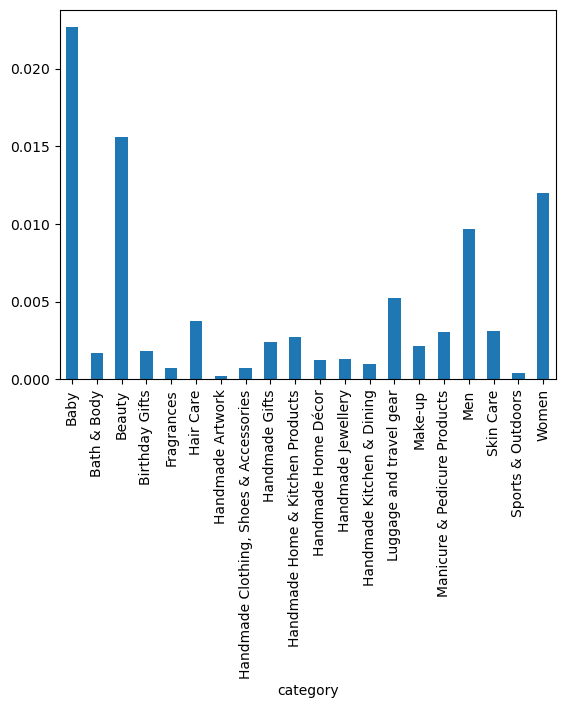

In [315]:
crosstab_top_20["proportion"].plot(kind="bar", stacked=True)
plt.show()


In [316]:
# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
# Objective: Investigate how different product categories influence product prices.

# Preliminary Step: Remove outliers in product prices.

# For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third 
# quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without 
# outliers.

# Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

def identify_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    return outliers

outliers = identify_outliers(df["price"])
len(outliers)


327688

In [317]:

df_without_price_outliers = df[~df["price"].isin(outliers)]
print(len(df))
print(len(df_without_price_outliers))

2443651
2115963


In [319]:
df_grouped = df_top_20.groupby("category").count()
df_grouped

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth
category,,,,,,,,
Baby,15050,15050,15050,15050,15050,15050,15050,15050
Bath & Body,19092,19092,19092,19092,19092,19092,19092,19092
Beauty,19312,19312,19312,19312,19312,19312,19312,19312
Birthday Gifts,18978,18978,18978,18978,18978,18978,18978,18978
Fragrances,18564,18564,18564,18564,18564,18564,18564,18564
Hair Care,18735,18735,18735,18735,18735,18735,18735,18735
Handmade Artwork,17878,17878,17878,17878,17878,17878,17878,17878
"Handmade Clothing, Shoes & Accessories",19229,19229,19229,19229,19229,19229,19229,19229
Handmade Gifts,18295,18295,18295,18295,18295,18295,18295,18295


In [337]:
# Violin Plots:

# Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better 
# visualization.

top_20 = df_without_price_outliers["category"].value_counts()[:20]
df_top_20 = df_without_price_outliers[df_without_price_outliers["category"].isin(top_20.index)]

C:\Users\ruben\AppData\Local\Temp\ipykernel_29616\2558891829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_20, x="category", y="price", palette="coolwarm")


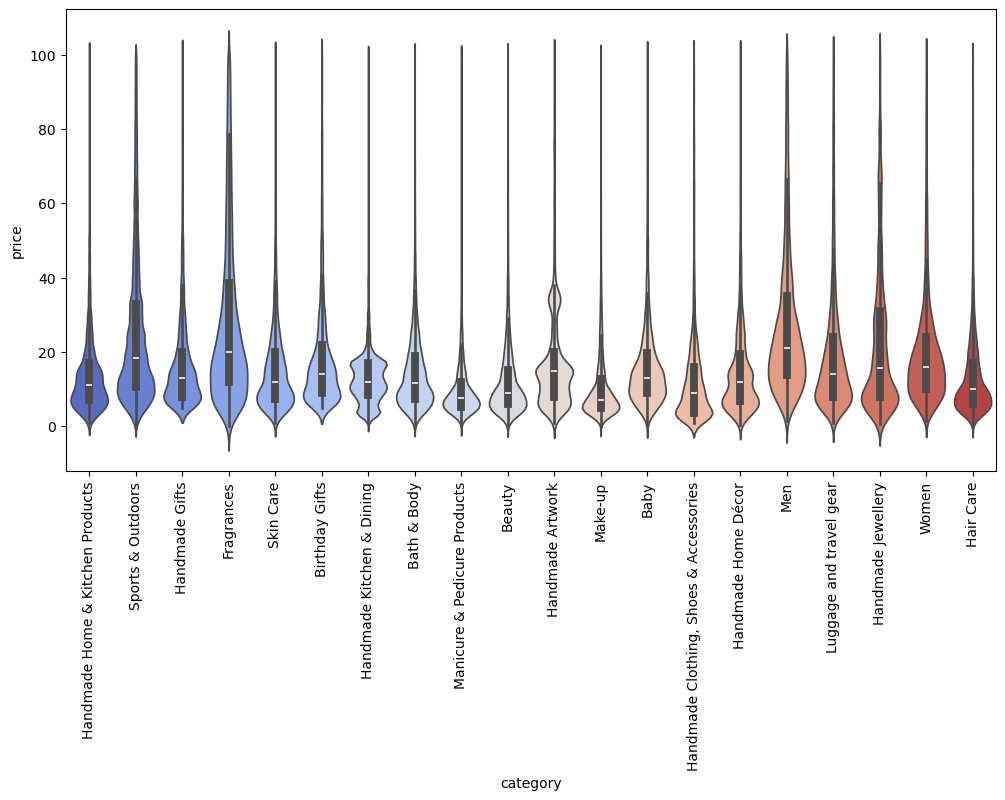

In [321]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_top_20, x="category", y="price", palette="coolwarm")

plt.xticks(rotation=90)
plt.show()

In [322]:
# Which product category tends to have the highest median price? Don't filter here by top categories.
df.groupby("category")["price"].median().idxmax()

'Laptops'

In [323]:
# Bar Charts:

# Create a bar chart comparing the average price of products for the top 10 product categories (based on count).

top_10 = df_without_price_outliers["category"].value_counts()[:10]
df_top_10 = df_without_price_outliers[df_without_price_outliers["category"].isin(top_10.index)]
average_price_products = df_top_10.groupby("category")["price"].mean()

C:\Users\ruben\AppData\Local\Temp\ipykernel_29616\3406096978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_top_10["category"], y=df_top_10["price"], palette='Set3')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Sports & Outdoors'),
  Text(1, 0, 'Handmade Gifts'),
  Text(2, 0, 'Skin Care'),
  Text(3, 0, 'Birthday Gifts'),
  Text(4, 0, 'Bath & Body'),
  Text(5, 0, 'Manicure & Pedicure Products'),
  Text(6, 0, 'Beauty'),
  Text(7, 0, 'Make-up'),
  Text(8, 0, 'Handmade Clothing, Shoes & Accessories'),
  Text(9, 0, 'Hair Care')])

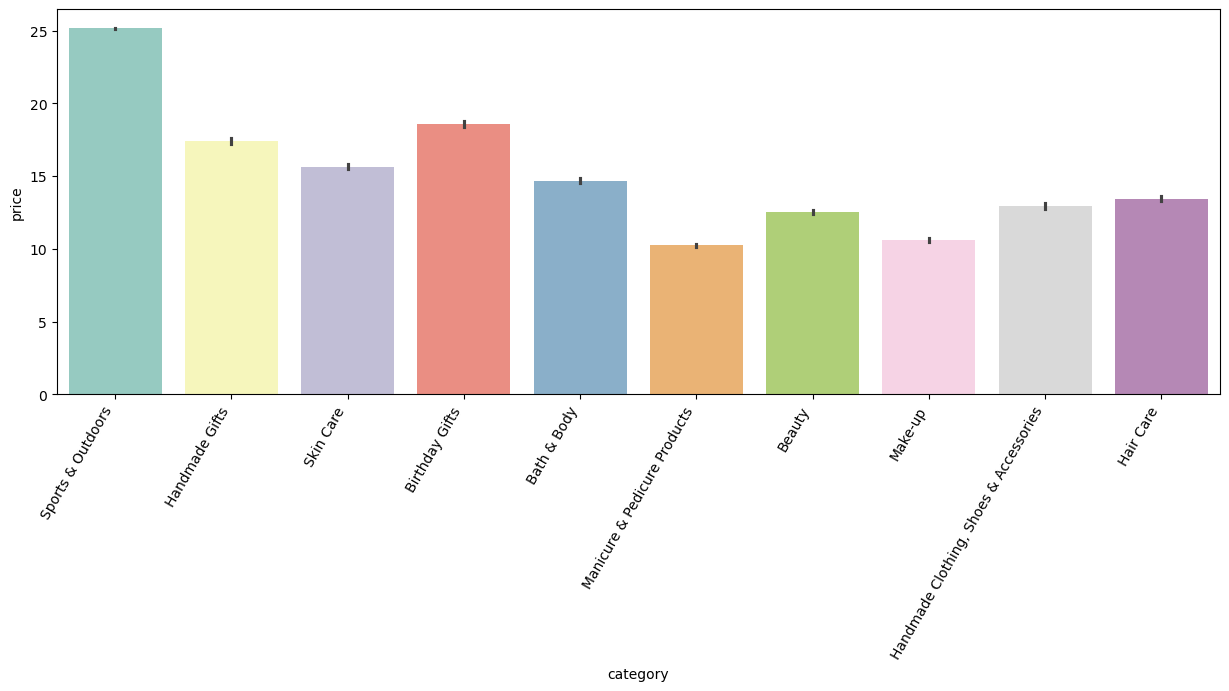

In [324]:
plt.figure(figsize=(15, 5))
sns.barplot(x=df_top_10["category"], y=df_top_10["price"], palette='Set3')

plt.xticks(rotation=60, ha='right')

In [325]:
# Which product category commands the highest average price? Don't filter here by top categories.

df.groupby("category")["price"].mean().idxmax()

'Laptops'

C:\Users\ruben\AppData\Local\Temp\ipykernel_29616\3120346907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df_top_10, x="category", y="stars", palette = "coolwarm")


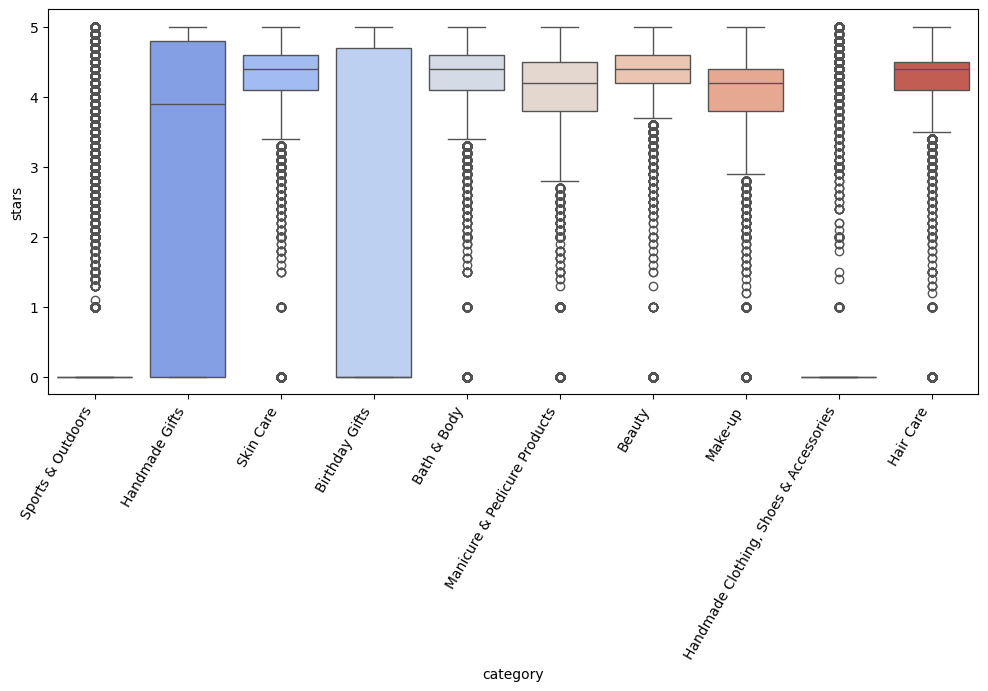

In [326]:
# Box Plots:

# Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.

plt.figure(figsize=(12, 5))
sns.boxplot(data = df_top_10, x="category", y="stars", palette = "coolwarm")
plt.xticks(rotation=60, ha='right')
plt.show()

In [327]:
# Which category tends to receive the highest median rating from customers? Don't filter here by top categories.
df.groupby("category")["stars"].mean().idxmax()

'Luxury Food & Drink'

In [328]:
# Part 3: Investigating the Interplay Between Product Prices and Ratings
# Objective: Analyze how product ratings (stars) correlate with product prices.

# Correlation Coefficients:

# Calculate the correlation coefficient between price and stars.

df["stars"].corr(df["price"])

-0.12490673262148641

In [329]:
df["stars"].corr(df["price"], method = "spearman")

-0.13316425462433912

# Is there a significant correlation between product price and its rating?

No, the correlation coefficient is very closed to 0, only a low negative correlation is between price and stars.

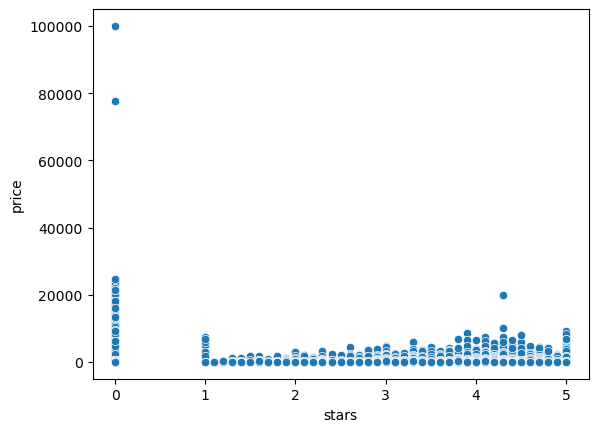

In [331]:
# Visualizations:

# Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?

sns.scatterplot(data = df, x = "stars", y="price")
plt.show()

In [332]:
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

In [333]:
potencial_categorical = df.select_dtypes("number").loc[:,df.select_dtypes("number").nunique() < 20]
df_numerical = df.select_dtypes("number").drop(columns = potencial_categorical.columns)
display(df_numerical.head())

,uid,stars,reviews,price,boughtInLastMonth
0,1,4.7,15308,21.99,0
1,2,4.7,98099,23.99,0
2,3,4.7,15308,21.99,0
3,4,4.7,7205,31.99,0
4,5,4.6,1881,17.99,0


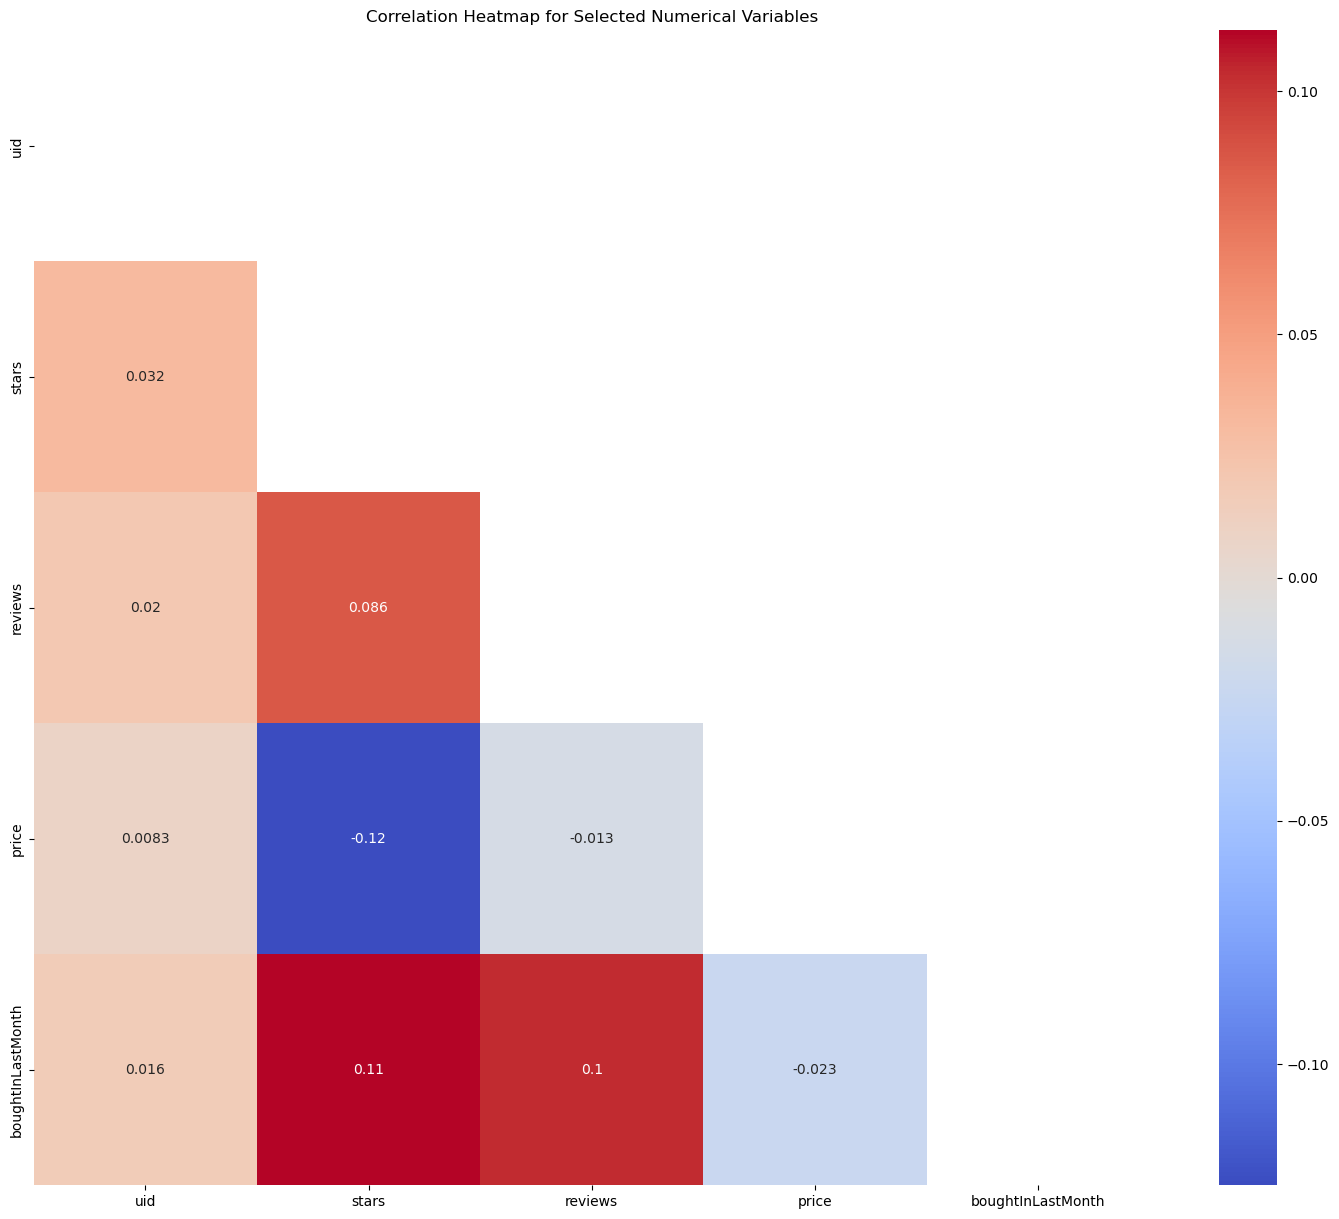

In [334]:
correlation_matrix = df_numerical.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(18, 15))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap for Selected Numerical Variables")
plt.show()

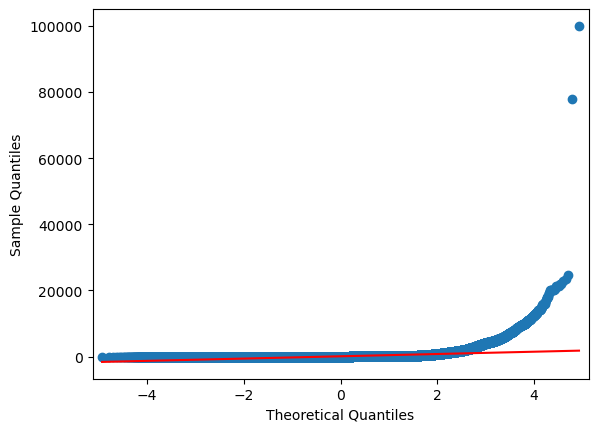

In [335]:
# Examine if product prices typically follow a normal distribution using a QQ plot.
import statsmodels.api as sm
sm.qqplot(df['price'], line='s')
plt.show()